In [41]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
import pandas as pd
import csv

# Interbank System
<!-- mydata = genfromtxt('interbankExposures.csv', delimiter=',')
adjacency = mydata[1:,1:]
print(adjacency) -->

In [42]:
input_data = pd.read_csv('interbankExposures.csv', header=None)
G = nx.DiGraph(input_data.values)

### Degree distribution

In [43]:
print(nx.info(G))

DiGraph with 145 nodes and 6191 edges


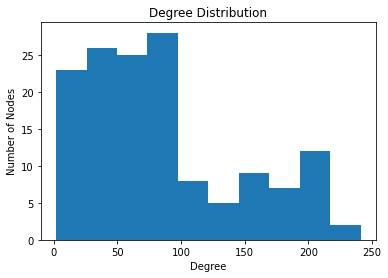

In [44]:
def degreePlot(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel("Degree")
    plt.ylabel('Number of Nodes')
    plt.show()
degreePlot(G)
# https://stackoverflow.com/questions/53958700/plotting-the-degree-distribution-of-a-graph-using-nx-degree-histogram

### Average Neighbour's degree

In [45]:
def avg_neigh_degree(G):
    data = {}
    for n in G.nodes():
        if G.degree(n):
            data[n] = float(sum(G.degree(i) for i in G[n]))/G.degree(n)
    return data
avg_neigh_degree(G)

{0: 0.0,
 1: 120.5,
 2: 43.2,
 3: 51.7926267281106,
 4: 114.93333333333334,
 5: 66.02083333333333,
 6: 57.86861313868613,
 7: 52.04205607476636,
 8: 84.23913043478261,
 9: 95.2,
 10: 92.0,
 11: 110.79629629629629,
 12: 88.828125,
 13: 59.29940119760479,
 14: 53.095238095238095,
 15: 86.69090909090909,
 16: 142.875,
 17: 80.32876712328768,
 18: 75.8974358974359,
 19: 95.05128205128206,
 20: 51.91338582677165,
 21: 66.20652173913044,
 22: 99.9076923076923,
 23: 0.0,
 24: 86.90425531914893,
 25: 40.51063829787234,
 26: 42.48780487804878,
 27: 47.68981481481482,
 28: 77.78260869565217,
 29: 66.77181208053692,
 30: 0.0,
 31: 53.33918128654971,
 32: 71.97058823529412,
 33: 87.5,
 34: 55.644067796610166,
 35: 143.7741935483871,
 36: 67.74358974358974,
 37: 58.8051948051948,
 38: 128.66666666666666,
 39: 52.45794392523364,
 40: 73.64,
 41: 56.57142857142857,
 42: 68.82352941176471,
 43: 57.01086956521739,
 44: 70.5,
 45: 67.02521008403362,
 46: 36.04081632653061,
 47: 65.54362416107382,
 48: 6

### Clustering

In [46]:
clustering = nx.clustering(G)
average_clustering = round((nx.average_clustering(G)),2)
print("The average clustering coefficient is: " +str(average_clustering)) 

The average clustering coefficient is: 0.73


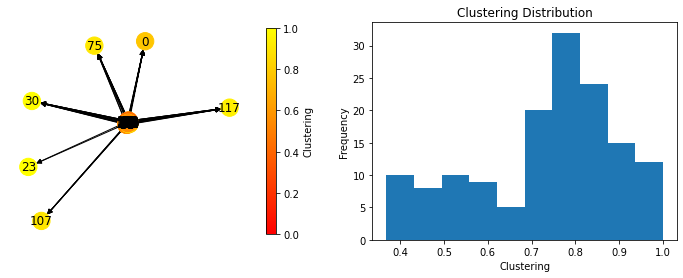

In [47]:
from matplotlib.cm import ScalarMappable
lcc = nx.clustering(G)

cmap = plt.get_cmap('autumn')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in G.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(G, node_color=node_colors, with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)

ax2.hist(lcc.values(), bins=10)
ax2.set_title('Clustering Distribution')
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.show()

### Assortativity 

The tendency for a network's nodes to attach to others that are similar in some way. 

In [48]:
assortativity = round((nx.degree_assortativity_coefficient(G)),2)
print("The assortativity of the network is: " + str(assortativity))

The assortativity of the network is: -0.34


### Betweenness Centrality

Text(0, 0.5, 'Number of Nodes')

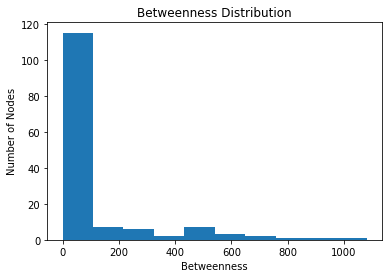

In [49]:
plt.hist(nx.betweenness_centrality(G, normalized = False).values())
plt.title('Betweenness Distribution' )
plt.xlabel('Betweenness')
plt.ylabel('Number of Nodes')

In [50]:
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.028032020095962784,
 4: 0.00011624314741446263,
 5: 0.00013336087232088803,
 6: 0.004934439329032405,
 7: 0.0347280398244729,
 8: 0.00019457240818802625,
 9: 0.00027291312974705463,
 10: 0.0002051233802428216,
 11: 0.0001175779892662186,
 12: 0.0003375141618437911,
 13: 0.010541935020498163,
 14: 5.356119472394082e-05,
 15: 0.00017861653200704634,
 16: 0.0,
 17: 0.0008794596002905234,
 18: 0.0005556091028629806,
 19: 0.00013722778128619488,
 20: 0.004894330068197072,
 21: 0.0010435308455109039,
 22: 0.00015257505587141303,
 23: 0.0,
 24: 0.0008355678602612221,
 25: 9.181379009461779e-05,
 26: 3.640857610473804e-05,
 27: 0.042037497133090324,
 28: 8.528078957304237e-05,
 29: 0.006139124672351489,
 30: 0.0,
 31: 0.010391085405694788,
 32: 0.00044748519498205184,
 33: 0.0005263559055784056,
 34: 0.016634516615527957,
 35: 1.7239464087025003e-05,
 36: 0.0009627070872680685,
 37: 0.0005279256288273284,
 38: 0.0,
 39: 0.025850093103268662,
 40: 0.000141690417

### Closeness Centrlity 


Text(0, 0.5, 'Number of Nodes')

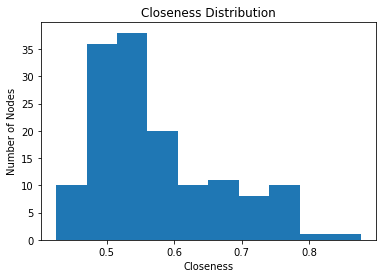

In [51]:
plt.hist(nx.closeness_centrality(G).values())
plt.title('Closeness Distribution' )
plt.xlabel('Closeness')
plt.ylabel('Number of Nodes')

### Eigenvector Centrality 

Text(0, 0.5, 'Number of Nodes')

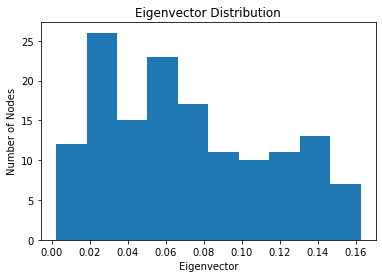

In [52]:
plt.hist(nx.eigenvector_centrality(G).values())
plt.title('Eigenvector Distribution' )
plt.xlabel('Eigenvector')
plt.ylabel('Number of Nodes')

In [53]:
bankEquities = pd.read_csv('bankEquities.csv', header=None)
bankExternalAsset = pd.read_csv('externalAssets.csv', header=None)

In [70]:
bankEquities.max(axis=1)

0    168110000.0
dtype: float64

(1000.0, 170000000.0)

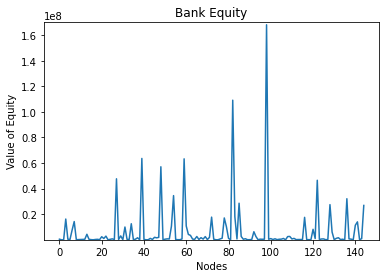

In [60]:
row = bankEquities.iloc[0]
row.plot()
plt.title('Bank Equity')
plt.xlabel('Nodes')
plt.ylabel('Value of Equity')
plt.ylim(1000,170000000)

In [61]:
bankExternalAsset

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,2154600.0,29473,156460.0,343060000.0,1846500.0,4965700.0,64185000.0,383630000.0,3019900.0,2262800.0,...,533010.0,359500000.0,1066700.0,3807900.0,459280.0,301120000.0,286540000.0,1215600.0,15375000.0,84108000.0


In [65]:
bankExternalAsset.max(axis=1)

0    2.119500e+09
dtype: float64

(20000.0, 2200000000.0)

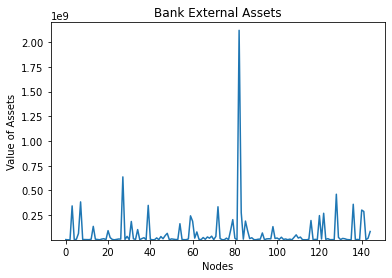

In [69]:
row = bankExternalAsset.iloc[0]
row.plot()
plt.title('Bank External Assets')
plt.xlabel('Nodes')
plt.ylabel('Value of Assets')
plt.ylim(20000,2200000000)